<a href="https://colab.research.google.com/github/sugiyama404/DecideBudgetFromWalras/blob/main/make_dataset/MAKE_CSV_MONETTALYBASE_BY_YEAY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import time

In [2]:
drive.mount('/content/drive/')
nov_dir = 'Colab Notebooks/dataset/walras_equation/'
exp_dir = 'Colab Notebooks/workspace/export/'
mbase_path = '/content/drive/My Drive/' + nov_dir + 'mblong.xlsx'
save_path = '/content/drive/My Drive/' + nov_dir + 'MONETTALYBASE_BY_YEAR.csv'
save_path2 = '/content/drive/My Drive/' + nov_dir + 'BASIC_DATE.csv'
save_path3 = '/content/drive/My Drive/' + nov_dir + 'REAL_OR_NOMINAL.csv'
save_path4 = '/content/drive/My Drive/' + exp_dir + 'Average_Rate_Of_Change.png'
excel_sheet_name='平残（Average amounts outstanding）'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# EXCELデータの読み込み加工

In [3]:
df = pd.read_excel(mbase_path, sheet_name=excel_sheet_name)
df = df.drop(range(6))
df = pd.concat([df['Unnamed: 1'], df['Unnamed: 7']], axis=1)
df = df.rename(columns={'Unnamed: 1': 'DATE', 'Unnamed: 7': 'MONETTALYBASE'})
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
df = df.reset_index(drop=True)
drop_index = df.index[(df.index >= 612)]
df = df.drop(drop_index)
df = df.set_index('DATE')
df.head()

,MONETTALYBASE
DATE,
1970-01-31,43324
1970-02-28,43902
1970-03-31,44694
1970-04-30,45126
1970-05-31,45574


# 年の増加率を算出

In [4]:
df2 = df[(df.index.month == 1)]
df2.index = df2.index.year
df2 = df2.rename(columns={'MONETTALYBASE':'JAN'})

df3 = df[(df.index.month == 12)]
df3.index = df3.index.year
df3 = df3.rename(columns={'MONETTALYBASE':'DEC'})

dfy = pd.concat([df2['JAN'], df3['DEC']], axis=1)
dfy['MONETTALYBASE'] = dfy['DEC'] - dfy['JAN']
dfy = dfy.drop(['DEC', 'JAN'], axis=1)
dfy.to_csv(save_path, sep=",")
dfy.tail()

,MONETTALYBASE
DATE,
2016,731217
2017,411887
2018,217029
2019,148531
2020,946152


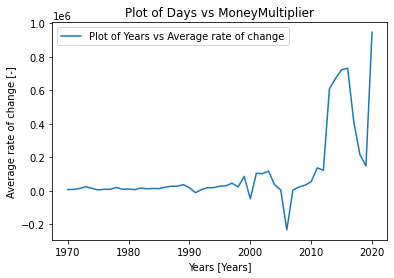

In [5]:
fig = plt.figure()

plt.plot(dfy.index,dfy['MONETTALYBASE'], label="Plot of Years vs Average rate of change")

plt.title('Plot of Days vs MoneyMultiplier')
plt.ylabel('Average rate of change [-]')
plt.xlabel('Years [Years]')
plt.legend()

fig.savefig(save_path4)
plt.show()

# その他のデータセット作成

In [6]:
data = {
  'name': ['inflation_rate','multiplier_public_investment','multiplier_tax_reduction'],
  'value': [-0.02,1.14,0.3],
}

df_basic = pd.DataFrame(data = data)
df_basic = df_basic.set_index('name', drop=False)
df_basic = df_basic.drop(['name'], axis=1)
df_basic.to_csv(save_path2, sep=",")
df_basic

,value
name,
inflation_rate,-0.02
multiplier_public_investment,1.14
multiplier_tax_reduction,0.30


In [7]:
df2 = dfy[(dfy.index == 2020)].values
mb = df2[0][0]
mb

data = {
  'name': ['GDP','unemployment_rate','completely_unemployed','wage'],
  'REAL': [535.7,2.8,191,318299],
}

df_basic_2 = pd.DataFrame(data = data)
df_basic_2 = df_basic_2.set_index('name', drop=False)
df_basic_2 = df_basic_2.drop(['name'], axis=1)
df_basic_2.to_csv(save_path3, sep=",")
df_basic_2

,REAL
name,
GDP,535.7
unemployment_rate,2.8
completely_unemployed,191.0
wage,318299.0
